# Simulations of sampling from a normal distribution

Tong Shu Li

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as scp

from itertools import product
from math import sqrt
from tqdm import tqdm

In [2]:
np.random.seed(20160427)

In [3]:
%matplotlib inline

## Constant definitions

In [4]:
vals = [
    (2, 10, 2),
    (15, 50, 5),
    (60, 100, 10),
    (120, 500, 20),
    (600, 1000, 100),
    (2000, 15000, 1000)
]

In [5]:
del_var = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

In [6]:
num_samp = []
for start, stop, inc in vals:
    num_samp += [i for i in range(start, stop+inc, inc)]

In [7]:
len(num_samp)

57

In [8]:
# determines curve smoothness
# value determined experimentally
reps = 1000

## Curves under investigation

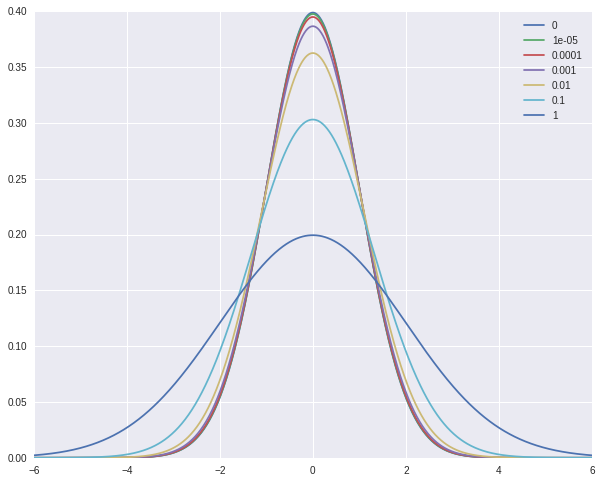

In [9]:
bound = 6
x = np.linspace(-bound, bound, 1000)
plt.figure(figsize = (10, 8))
for var in del_var:
    y = scp.stats.norm.pdf(x, loc = 0, scale = 1 + sqrt(var))
    plt.plot(x, y, label = str(var))
    
plt.legend()
plt.show()  

## Simulation code

In [10]:
def run_trials(N, dvar, M):
    """Run a sampling of N points from two norm distributions
    with a delta variance of dvar M times.
    
    Return the percentage of times that bartlett's test is significicant
    """
    mu = 0
    sigma = 1
    threshold = 0.05
    
    signif = 0
    for i in range(M):
        a = np.random.normal(mu, sigma, N)
        b = np.random.normal(mu, sigma + sqrt(dvar), N)
        
        t, pval = scp.stats.bartlett(a, b)
        signif += pval < threshold
        
    return signif / M

In [11]:
res = []
for N, dvar in tqdm(product(num_samp, del_var), total = len(num_samp) * len(del_var)):
    frac_signif = run_trials(N, dvar, reps)
    res.append((N, dvar, reps, frac_signif))
    
res = pd.DataFrame(res, columns = ["N", "dvar", "reps", "frac_signif"])

100%|██████████| 399/399 [02:41<00:00,  1.46s/it]


## Plot results

In [12]:
def plot_res(res):
    temp = res.pivot(index = "N", columns = "dvar", values = "frac_signif")

    fig = temp.plot(
        kind = "line",
        figsize = (10, 8)
    )
    fig.set_title(
        "Probability Bartlett's test is significant\n"
        "for different sample sizes and variance difference (norm dist)"
    )
    fig.set_ylabel("Probability p value is less than threshold")
    fig.set_ylim((0, 1.1))
    fig.set_xlabel("Number of points sampled from distribution")
    fig.legend(
        title = "Delta variance", fontsize = 13,
        loc = "center left", bbox_to_anchor = (1, 0.5)
    )

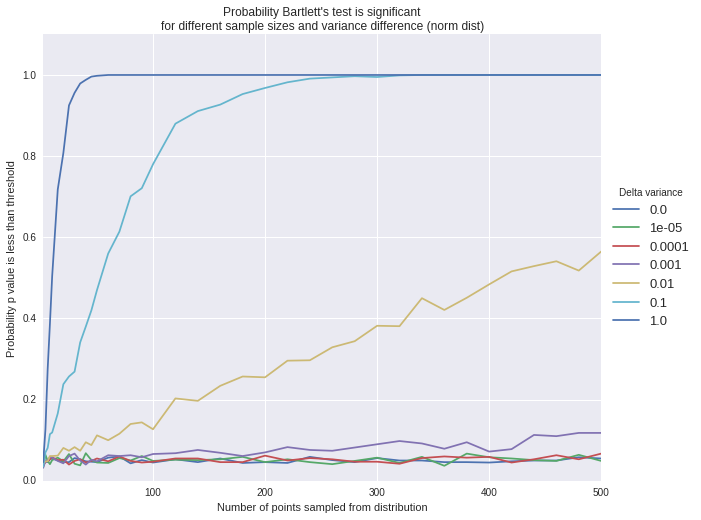

In [13]:
plot_res(res.query("N <= 500"))

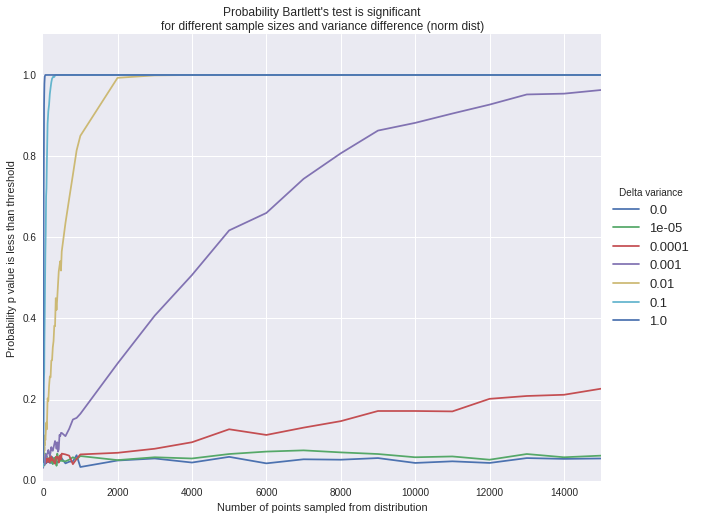

In [14]:
plot_res(res)